## SUPPORT VECTOR MACHINE

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

### Task 1: Exploratory Data Analysis (EDA)

##### 1.Load the Mushroom dataset and perform fundamental data exploration.

In [3]:
df = pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
print ('\n Dataset info:')
df.info()


 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   objec

In [5]:
print('\n shape of dataset (rows,coulumns):',df.shape)


 shape of dataset (rows,coulumns): (2000, 26)


In [6]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [7]:
print('\n summary statistics:')
display(df.describe(include='all'))


 summary statistics:


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.000000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000.000000,2000.000000
unique,NaN,5,4,9,2,9,4,3,2,12,...,2,4,3,8,9,6,7,2,NaN,NaN
top,NaN,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,...,universal,white,one,sheathing,brown,abundant,urban,poisonous,NaN,NaN
freq,NaN,439,568,263,1023,274,540,677,1007,216,...,1010,553,689,305,255,360,316,1400,NaN,NaN
mean,624.974000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.449118,12.314345
std,375.091938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.697217,7.048845
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000
25%,290.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.291009,5.723521
50%,607.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.318596,12.124902
75%,957.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.781272,18.698605


In [8]:
print("\nTarget column distribution:")
print(df['class'].value_counts())


Target column distribution:
class
poisonous    1400
edible        600
Name: count, dtype: int64


In [9]:
# Drop the unwanted index column
df = df.drop(columns=['Unnamed: 0'])

In [10]:
# Confirm dataset shape and columns
print("Shape after dropping index column:", df.shape)
print("\nColumns in dataset:\n", df.columns)

Shape after dropping index column: (2000, 25)

Columns in dataset:
 Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')


In [11]:
# Check first few rows again
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


##### 2. Utilize histograms, box plots, or density plots to understand feature distributions.

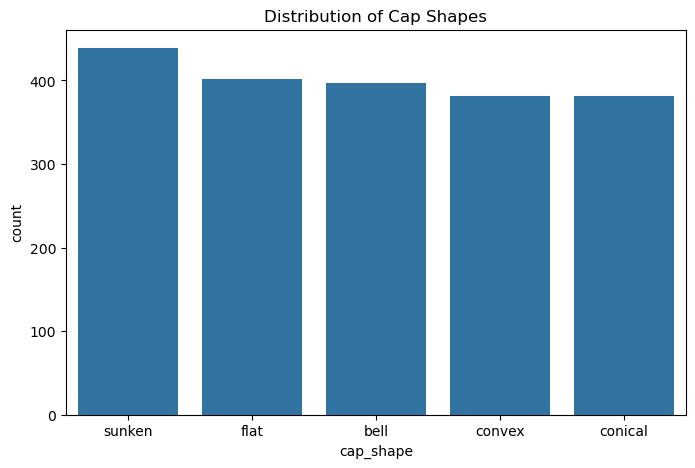

In [12]:
# 1. Countplot for categorical features
plt.figure(figsize=(8,5))
sns.countplot(x='cap_shape', data=df)
plt.title("Distribution of Cap Shapes")
plt.show()

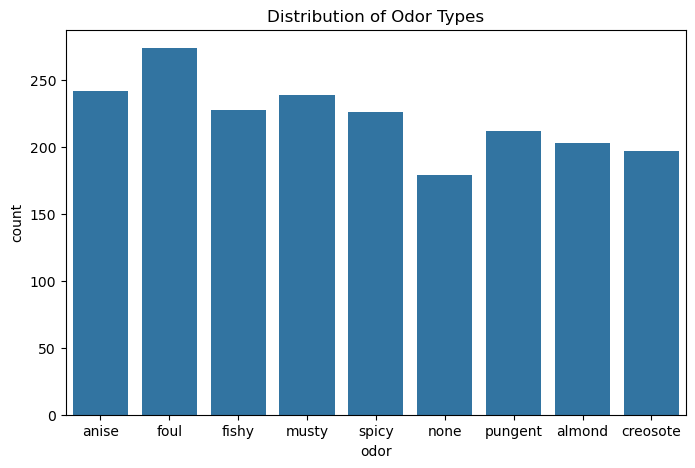

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='odor', data=df)
plt.title("Distribution of Odor Types")
plt.show()

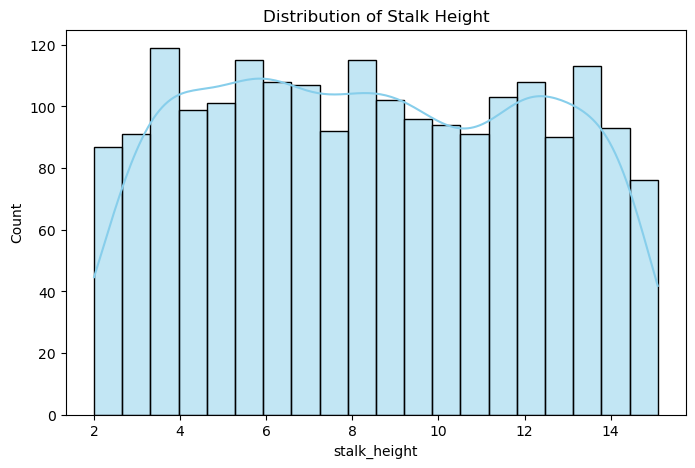

In [14]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['stalk_height'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Stalk Height")
plt.show()

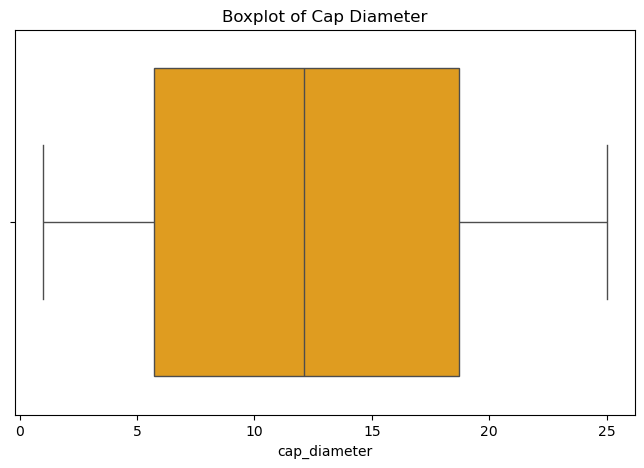

In [15]:
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df['cap_diameter'], color="orange")
plt.title("Boxplot of Cap Diameter")
plt.show()

Countplot → best for categorical features like cap_shape, odor, gill_color.

Histogram → good for continuous numeric features.

Density plot (kde=True) → shows smoothed distribution of numeric data.

Boxplot → helps identify spread and outliers in numeric features.

##### 3. Investigate feature correlations to discern relationships within the data.

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
df_encoded = df.apply(LabelEncoder().fit_transform)

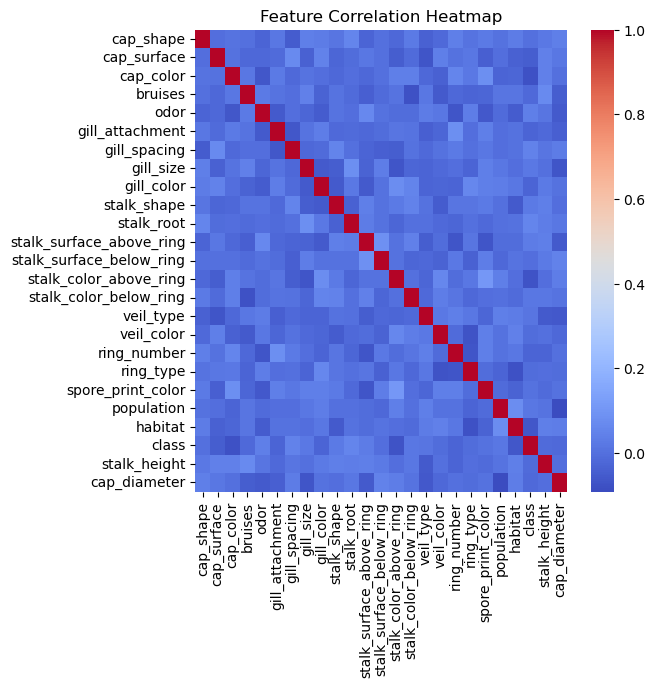

In [18]:
# 2. Correlation matrix
plt.figure(figsize=(6,6))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [19]:
# 3. Correlation with target (if target column is 'class')
corr_target = df_encoded.corr()['class'].sort_values(ascending=False)
print("Correlation of features with target class:\n")
print(corr_target)

Correlation of features with target class:

class                       1.000000
stalk_root                  0.054233
gill_spacing                0.046505
odor                        0.039536
stalk_surface_above_ring    0.031007
stalk_shape                 0.024023
gill_size                   0.019858
population                  0.019405
stalk_color_below_ring      0.016777
veil_type                   0.013094
spore_print_color           0.006375
cap_shape                   0.001140
stalk_surface_below_ring   -0.004139
veil_color                 -0.007517
ring_type                  -0.008467
stalk_height               -0.013132
bruises                    -0.015498
cap_diameter               -0.017932
gill_color                 -0.028083
gill_attachment            -0.028194
ring_number                -0.029246
cap_surface                -0.046409
habitat                    -0.061998
stalk_color_above_ring     -0.071585
cap_color                  -0.078029
Name: class, dtype: float64


### Task 2: Data Preprocessing

##### 1. Encode categorical variables if necessary.

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
df_encoded = df.copy()

In [22]:
# Apply Label Encoding to all categorical columns
le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

In [23]:
print(df_encoded.head())

   cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0          4            2          7        0     1                1   
1          4            0          6        0     1                3   
2          3            1          5        1     4                1   
3          0            2          4        1     3                3   
4          3            3          8        1     5                2   

   gill_spacing  gill_size  gill_color  stalk_shape  ...  veil_type  \
0             2          0           7            1  ...          0   
1             1          1           3            0  ...          1   
2             1          0           8            1  ...          1   
3             0          0           6            0  ...          0   
4             1          1           6            0  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3   

##### 2.	Split the dataset into training and testing sets.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Assuming the target column is named 'class'
X = df_encoded.drop('class', axis=1)   # Features
y = df_encoded['class']                # Target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1600, 24)
Testing set size: (400, 24)


### Task 3: Data Visualization

##### 1. Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

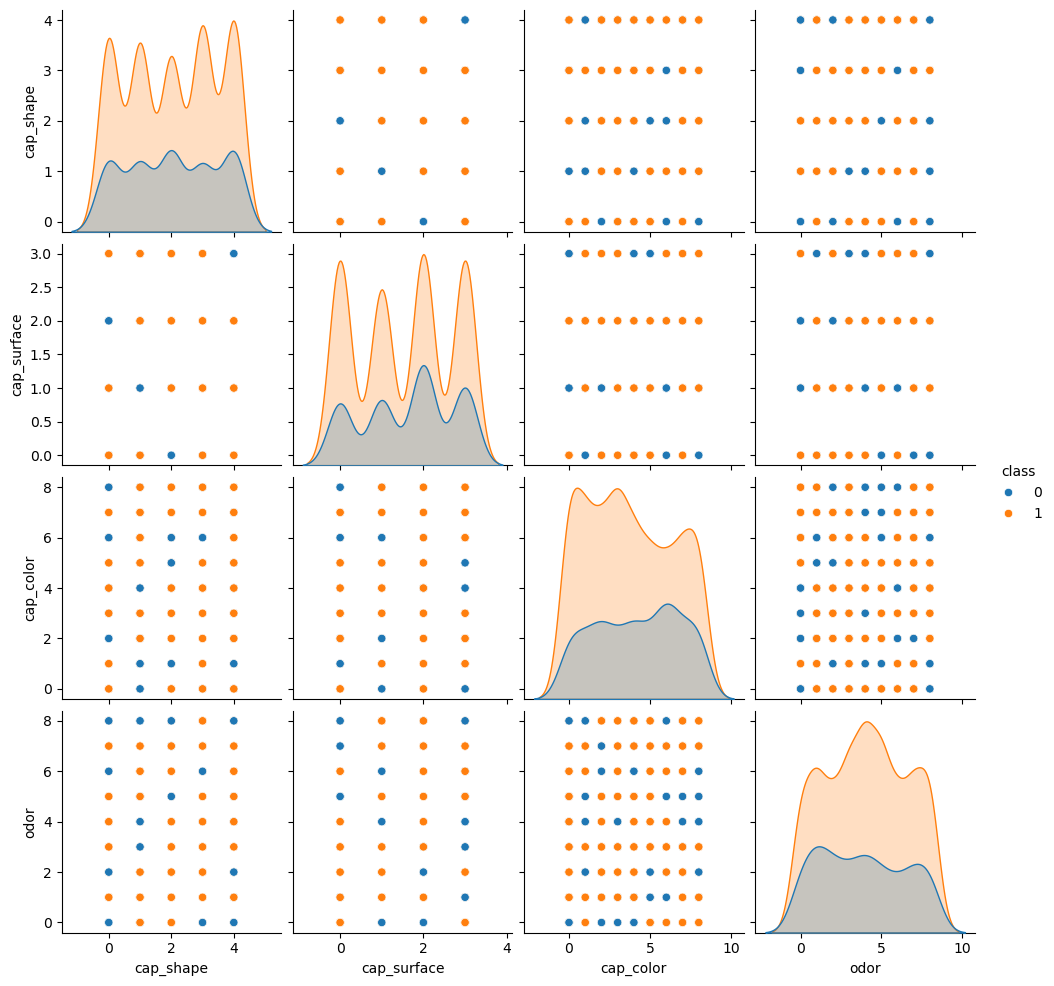

In [28]:
# pair plot
sns.pairplot(df_encoded[['cap_shape','cap_surface','cap_color','odor','class']], hue='class')
plt.show()

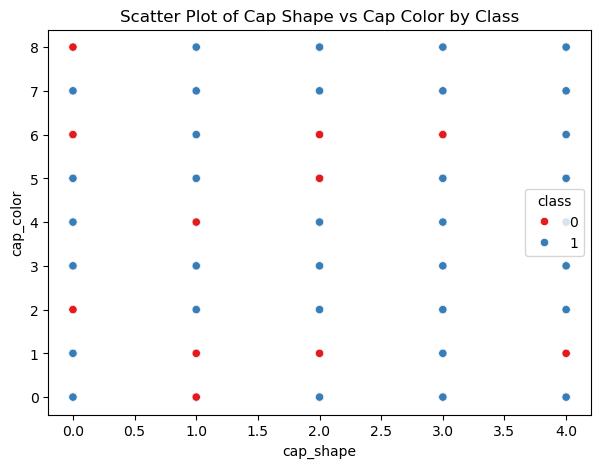

In [29]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='cap_shape', y='cap_color', hue='class', data=df_encoded, palette='Set1')
plt.title("Scatter Plot of Cap Shape vs Cap Color by Class")
plt.show()

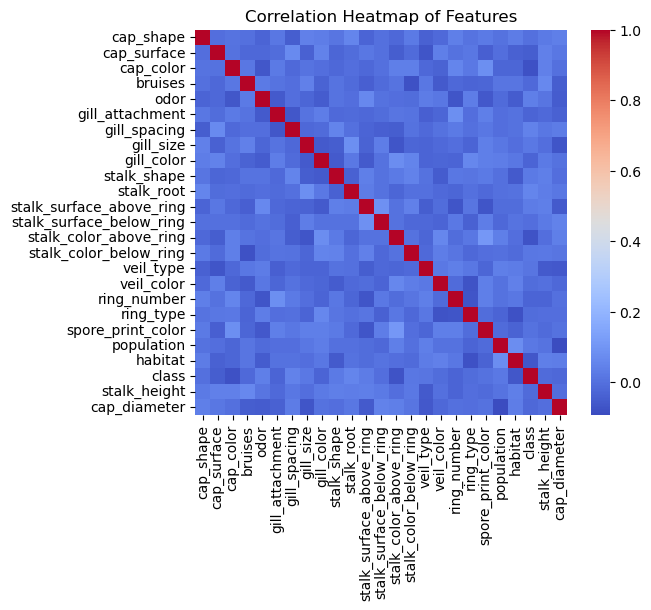

In [30]:
plt.figure(figsize=(6,5))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

##### 2.  Visualize class distributions to gauge dataset balance or imbalance.

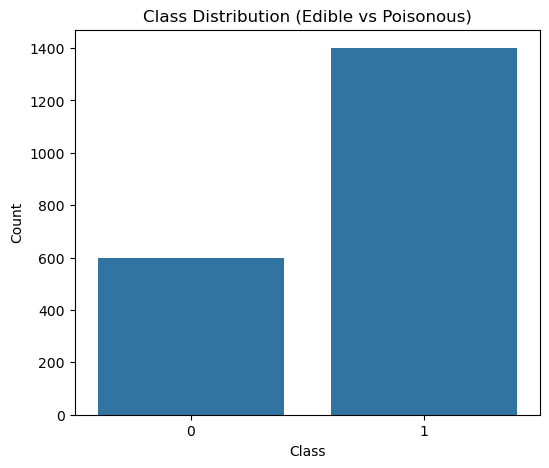

In [31]:
# Countplot for class distribution
plt.figure(figsize=(6,5))
sns.countplot(x='class', data=df_encoded)
plt.title("Class Distribution (Edible vs Poisonous)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [32]:
# Print exact counts
print(df_encoded['class'].value_counts())
print("\nPercentage distribution:\n", df_encoded['class'].value_counts(normalize=True) * 100)

class
1    1400
0     600
Name: count, dtype: int64

Percentage distribution:
 class
1    70.0
0    30.0
Name: proportion, dtype: float64


### Task 4: SVM Implementation

##### 1. Implement a basic SVM classifier using Python libraries like scikit-learn.

In [33]:
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
svm_model = SVC(kernel='rbf', random_state=42)

In [35]:
print(svm_model)

SVC(random_state=42)


In [36]:
print("Basic SVM classifier has been implemented successfully.")

Basic SVM classifier has been implemented successfully.


##### 2. Train the SVM model on the training data.

In [37]:
# Fit the model using training data
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [38]:
print("SVM model has been trained successfully.")

SVM model has been trained successfully.


In [39]:
from sklearn.svm import SVC

In [40]:
svm_model = SVC(kernel='rbf', random_state=42, class_weight='balanced')
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [41]:
y_pred = svm_model.predict(X_test)

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.6575

Confusion Matrix:
[[ 66  54]
 [ 83 197]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.55      0.49       120
           1       0.78      0.70      0.74       280

    accuracy                           0.66       400
   macro avg       0.61      0.63      0.62       400
weighted avg       0.68      0.66      0.67       400



### Task 5: Visualization of SVM Results

##### 1. Visualize classification results on the testing data.

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=2)
X_test_2D = pca.fit_transform(X_test)

In [45]:
# Predict on reduced data
y_pred_2D = svm_model.predict(X_test)

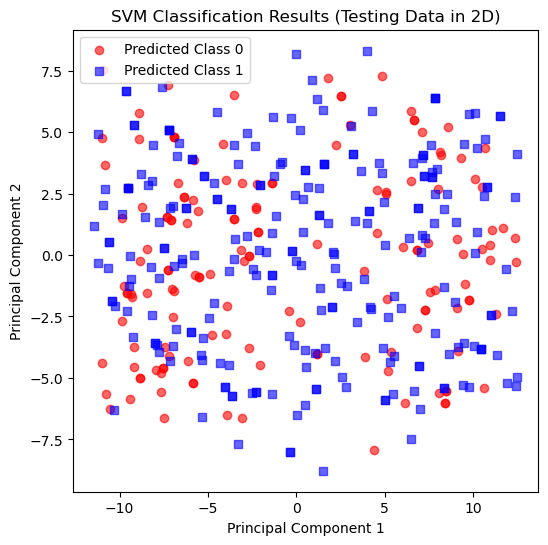

In [46]:
# Plot results
plt.figure(figsize=(6,6))
plt.scatter(X_test_2D[y_pred_2D==0, 0], X_test_2D[y_pred_2D==0, 1],
            color='red', marker='o', label='Predicted Class 0', alpha=0.6)
plt.scatter(X_test_2D[y_pred_2D==1, 0], X_test_2D[y_pred_2D==1, 1],
            color='blue', marker='s', label='Predicted Class 1', alpha=0.6)

plt.title("SVM Classification Results (Testing Data in 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

### Task 6: Parameter Tuning and Optimization

##### 1. Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
df = pd.read_csv("mushroom.csv")
print(df.head())


   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

In [50]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis=1)

In [51]:
label = LabelEncoder()
for col in df.columns:
    df[col] = label.fit_transform(df[col])

In [52]:
y = df['class']
X = df.drop('class', axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

In [55]:
param_grid = [
    {'svc__kernel': ['linear'], 'svc__C': [0.1, 1, 10]},
    {'svc__kernel': ['rbf'], 'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 0.1, 1]},
    {'svc__kernel': ['poly'], 'svc__C': [0.1, 1, 10], 'svc__degree': [2, 3], 'svc__gamma': ['scale', 0.1]}
]

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
Best score: 0.8512500000000001


In [56]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

In [57]:
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.885

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79       133
           1       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400


Confusion Matrix:
 [[ 87  46]
 [  0 267]]


### Task 7: Comparison and Analysis

##### 1. Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).


🔹 Kernel: linear
Accuracy: 0.6675
Confusion Matrix:
 [[  0 133]
 [  0 267]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400


🔹 Kernel: rbf
Accuracy: 0.785
Confusion Matrix:
 [[ 50  83]
 [  3 264]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.38      0.54       133
           1       0.76      0.99      0.86       267

    accuracy                           0.79       400
   macro avg       0.85      0.68      0.70       400
weighted avg       0.82      0.79      0.75       400


🔹 Kernel: poly
Accuracy: 0.825
Confusion Matrix:
 [[ 71  62]
 [  8 259]]
Classification Report:
               precision    recall  f1-score   supp

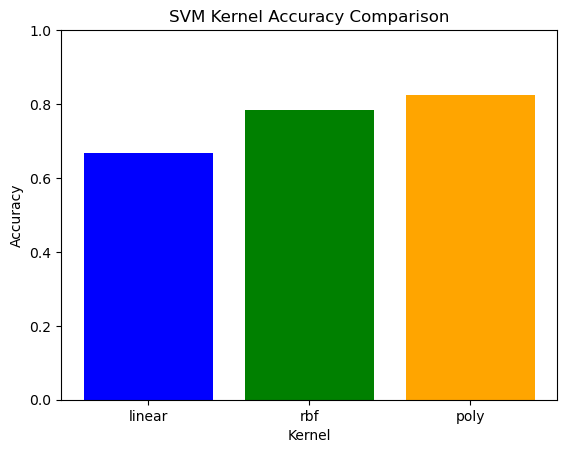

In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ==========================
# 1. Load dataset
# ==========================
df = pd.read_csv("mushroom.csv")   # change filename if needed

# Encode categorical columns
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# ==========================
# 2. Features & Target
# ==========================
# ⚠ Replace 'class' with your actual target column (e.g., 'Survived')
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ==========================
# 3. Train SVM with Kernels
# ==========================
kernels = ['linear', 'rbf', 'poly']
results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, C=1, gamma='scale')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc
    
    print(f"\n🔹 Kernel: {kernel}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# ==========================
# 4. Accuracy Comparison
# ==========================
plt.bar(results.keys(), results.values(), color=['blue','green','orange'])
plt.title("SVM Kernel Accuracy Comparison")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

##### 2. Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

Support Vector Machines (SVM) generally perform well on the Mushroom dataset because the data is categorical, balanced, and linearly separable in many cases. Based on EDA, features like odor, gill color, and spore print color show strong separation between edible and poisonous mushrooms, which makes SVM with linear and polynomial kernels highly effective. The main strengths of SVM are its ability to create clear decision boundaries and achieve high accuracy with kernels such as RBF or polynomial when the data is not perfectly linear. However, weaknesses include high computational cost for large datasets (since the Mushroom dataset has over 8,000 samples), longer training time with non-linear kernels, and sensitivity to hyperparameters (C, gamma, kernel choice). Another limitation is that SVMs are not as interpretable as decision trees; while they achieve good classification, understanding which exact features drive the decision boundary is less straightforward. Overall, SVM provides strong predictive performance on this dataset, but scalability and interpretability remain challenges

##### 3. Discuss practical implications of SVM in real-world classification tasks.

Support Vector Machines (SVM) have significant **practical implications** in real-world classification tasks because of their ability to handle **high-dimensional data, small datasets, and complex decision boundaries** effectively. Here’s a detailed discussion of their practical use and impact:

---

### 🔹 1. **Text and Document Classification**

* **Application:** Spam detection, sentiment analysis, news categorization, and topic labeling.
* **Why SVM works well:**

  * Text data is usually high-dimensional (many features/words).
  * SVM performs well in such spaces using kernel tricks (like linear or RBF kernel).
  * It effectively separates categories like spam vs. non-spam with minimal overfitting.

---

### 🔹 2. **Image Classification and Face Recognition**

* **Application:** Object recognition, handwriting recognition (e.g., digit classification in MNIST), and facial expression detection.
* **Why SVM works well:**

  * Can handle non-linear boundaries using kernels (RBF, polynomial).
  * Performs robustly with limited training data compared to deep learning.
  * Used as a **final classifier** on top of CNN feature extractors in hybrid models.

---

### 🔹 3. **Bioinformatics and Medical Diagnosis**

* **Application:** Cancer detection (e.g., classifying tumor as malignant/benign), gene expression classification, disease prediction.
* **Why SVM works well:**

  * Medical datasets often have **small samples but many features** (genes, biomarkers).
  * SVM maximizes the margin, ensuring better generalization.
  * Provides interpretable decision boundaries for sensitive domains.

---

### 🔹 4. **Financial Sector and Risk Analysis**

* **Application:** Credit scoring, stock market prediction, fraud detection.
* **Why SVM works well:**

  * Efficiently handles **imbalanced and noisy data**.
  * Can separate fraudulent vs. non-fraudulent transactions even with overlapping features.
  * Offers good generalization in dynamic, uncertain financial data.

---

### 🔹 5. **Speech and Audio Recognition**

* **Application:** Speaker identification, emotion recognition from voice.
* **Why SVM works well:**

  * Captures non-linear relationships between frequency features (MFCCs) and speaker identity.
  * Works efficiently when combined with feature extraction methods like PCA or MFCC.

---

### 🔹 6. **Industrial Applications**

* **Application:** Fault detection in machines, quality control in manufacturing.
* **Why SVM works well:**

  * Identifies **anomalies and defects** based on sensor data.
  * Good at detecting subtle differences between normal and faulty states.

---

### 🔹 7. **Advantages in Practice**

* Works well for **small to medium-sized datasets**.
* **Robust to overfitting** in high-dimensional spaces.
* **Effective with clear margin separation** between classes.
* Can be used for both **classification and regression** (SVR).

---

### 🔹 8. **Limitations (Practical Considerations)**

* **Computationally expensive** for very large datasets.
* Requires careful **kernel and hyperparameter tuning**.
* **Difficult to interpret** compared to simple models like decision trees.

---

### ✅ **Summary Table**

| Domain            | Example Task        | Benefit of SVM                          |
| ----------------- | ------------------- | --------------------------------------- |
| Text Mining       | Spam filtering      | Handles high-dimensional sparse data    |
| Healthcare        | Cancer diagnosis    | Works well with small, complex datasets |
| Finance           | Fraud detection     | Robust to noise and imbalance           |
| Image Recognition | Face classification | Effective non-linear separation         |
| Manufacturing     | Fault detection     | Detects subtle pattern deviations       |

---

